In [1]:
import numpy as np
import pandas as pd

from sklearnex import patch_sklearn
patch_sklearn()

import os

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Basic Modelling of Disposition

Note:

We will change CFRM to CAND because it would be more useful to determine FALSE POSITIVES vs CANDIDATES.

In [2]:
classif_map = {
    'M': 0, 'K': 1, 'G': 2, 'F': 3, 'A': 4, 'B': 5, 'O': 6
}

df = pd.read_csv(os.getcwd() + '\\..\\..\\data\\final\\FinalFE3.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['ObjectOfInterest', 'RightAscension', 'Declination', 'PlanetType', 'PlanetName', 'TransitDepth', 'TransitDuration', 'PlanetEarthRadius', 'StellarSunRadius'], inplace=True)
df['StarClassification'] = df['StarClassification'].map(classif_map)

mapping = {'FPOS': 0, 'CFRM': 1, 'CAND': -1}
df['Disposition'] = df['Disposition'].map(mapping)

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
for col in df.columns:
    if col != 'Disposition' and col != 'StarClassification' and col != 'MainSequence':
        df[col] = pt.fit_transform(df[col].values.reshape(-1,1))

########################
# Feature Selection HERE

df = df.drop(columns=['StellarLogG'])

########################

test_df = df[df['Disposition']==-1]
train_df = df[df['Disposition']!=-1]
train_df

,Disposition,OrbitalPeriod,PlanetEquilibriumTemperature,PlanetInsolationValue,StellarEffectiveTemperature,StellarSunLuminosity,DistanceFromStarCoreinAU,StarClassification,MainSequence,PlanetEarthSize,StellarSunSize
0,1,-0.505008,0.707252,0.771780,0.544080,0.666840,-0.736224,3,0,0.866596,0.669235
1,1,0.389142,-0.364772,-0.350180,0.085129,-0.247965,0.179792,2,0,0.438782,-0.445430
2,1,-0.430022,0.065204,0.111223,-0.176345,-0.648174,-0.540725,2,0,0.433145,-0.915636
3,1,-1.071263,0.766717,0.830926,-0.196349,-0.242494,-0.963797,2,1,0.621065,0.043258
4,1,1.210633,-1.222459,-1.282632,-0.256561,-0.578201,1.501894,2,0,0.761085,-0.604723
...,...,...,...,...,...,...,...,...,...,...,...
12841,1,-0.262928,0.680998,0.745142,0.344403,0.844782,-0.666753,3,0,0.941163,1.167485
12842,1,0.520584,0.077211,0.122644,0.574444,0.878838,0.032850,3,0,-0.882544,0.979501
12843,1,0.170084,-0.296154,-0.275882,0.063369,-0.479513,-0.032102,2,0,-1.265553,-0.936788
12844,1,0.798440,-0.541288,-0.543756,0.097081,0.046319,0.626721,2,0,-0.644333,0.157863


In [3]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

balanced_df = train_df.copy()
X = balanced_df.drop(columns=['Disposition'])
y = balanced_df['Disposition']
rus = RandomUnderSampler(random_state=42)

X_rus, y_rus = rus.fit_resample(X, y)

balanced_df = X_rus.copy()
balanced_df['Disposition'] = y_rus

balanced_df

,OrbitalPeriod,PlanetEquilibriumTemperature,PlanetInsolationValue,StellarEffectiveTemperature,StellarSunLuminosity,DistanceFromStarCoreinAU,StarClassification,MainSequence,PlanetEarthSize,StellarSunSize,Disposition
0,-0.843393,0.182449,0.233686,-1.031444,-1.199539,-0.814301,1,1,0.917306,-0.811291,0
1,-1.539783,0.991139,1.050894,0.056833,-0.418595,-1.091483,2,0,-1.379662,-0.784665,0
2,-1.463690,1.750615,1.775294,0.639123,1.147028,-1.164436,3,0,-0.625250,1.301518,0
3,0.783207,-0.853511,-0.886635,-0.261033,-0.704263,0.785404,2,0,-1.064280,-0.901605,0
4,-1.252474,1.633208,1.666270,0.418723,1.185446,-1.123294,3,0,-0.857438,1.525103,0
...,...,...,...,...,...,...,...,...,...,...,...
5325,-0.262928,0.680998,0.745142,0.344403,0.844782,-0.666753,3,0,0.941163,1.167485,1
5326,0.520584,0.077211,0.122644,0.574444,0.878838,0.032850,3,0,-0.882544,0.979501,1
5327,0.170084,-0.296154,-0.275882,0.063369,-0.479513,-0.032102,2,0,-1.265553,-0.936788,1
5328,0.798440,-0.541288,-0.543756,0.097081,0.046319,0.626721,2,0,-0.644333,0.157863,1


In [4]:
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.77       522
           1       0.76      0.89      0.82       544

    accuracy                           0.80      1066
   macro avg       0.81      0.80      0.80      1066
weighted avg       0.81      0.80      0.80      1066



In [5]:
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2)

lr = DecisionTreeClassifier(random_state=42)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       522
           1       0.81      0.79      0.80       544

    accuracy                           0.80      1066
   macro avg       0.80      0.80      0.80      1066
weighted avg       0.80      0.80      0.80      1066



In [6]:
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2)

lr = RandomForestClassifier(random_state=42)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       546
           1       0.84      0.88      0.86       520

    accuracy                           0.86      1066
   macro avg       0.86      0.86      0.86      1066
weighted avg       0.86      0.86      0.86      1066



In [7]:
pd.DataFrame(lr.feature_importances_, index=X_rus.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
PlanetEarthSize,0.340357
DistanceFromStarCoreinAU,0.116210
OrbitalPeriod,0.112948
PlanetEquilibriumTemperature,0.107348
PlanetInsolationValue,0.097461
StellarEffectiveTemperature,0.077842
StellarSunSize,0.066195
StellarSunLuminosity,0.065088
StarClassification,0.009735
MainSequence,0.006816


# Basic Modelling of Planet Type

In [9]:
classif_map = {
    'M': 0, 'K': 1, 'G': 2, 'F': 3, 'A': 4, 'B': 5, 'O': 6
}

df = pd.read_csv(os.getcwd() + '\\..\\..\\data\\final\\FinalFE3.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df = df[df['Disposition']=='CFRM']
df.drop(columns=['ObjectOfInterest', 'RightAscension', 'Declination', 'Disposition', 'PlanetName', 'TransitDepth', 'TransitDuration', 'PlanetEarthRadius', 'StellarSunRadius'], inplace=True)

df['StarClassification'] = df['StarClassification'].map(classif_map)

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
pt = PowerTransformer()
for col in df.columns:
    if col != 'PlanetType' and col != 'StarClassification' and col != 'MainSequence':
        df[col] = pt.fit_transform(df[col].values.reshape(-1,1))
    else:
        df[col] = le.fit_transform(df[col].values.reshape(-1,1))

######################
# Feature Selection HERE

df = df.drop(columns=['StellarLogG', 'OrbitalPeriod', 'PlanetEquilibriumTemperature', 'PlanetInsolationValue', 'StellarEffectiveTemperature'])


######################


from imblearn.over_sampling import SMOTE

TARGET = 'PlanetType'

balanced_df = df.copy()
X = balanced_df.drop(columns=[TARGET])
y = balanced_df[TARGET]
rus = SMOTE(random_state=None)

X_rus, y_rus = rus.fit_resample(X, y)

balanced_df = X_rus.copy()
balanced_df[TARGET] = y_rus

balanced_df

C:\Users\paolo\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\paolo\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,StellarSunLuminosity,DistanceFromStarCoreinAU,StarClassification,MainSequence,PlanetEarthSize,StellarSunSize,PlanetType
0,1.366680,-1.160395,3,0,2.354968,1.198140,0
1,0.114637,0.052861,2,0,1.793128,-0.160035,0
2,-0.385474,-0.894729,2,0,1.785058,-0.730394,0
3,0.121647,-1.473720,2,1,2.044779,0.434225,0
4,-0.299755,1.609786,2,0,2.225731,-0.353402,0
...,...,...,...,...,...,...,...
5820,0.723010,1.895699,2,0,2.012712,0.964682,4
5821,0.179959,0.423294,2,0,0.662988,0.001996,4
5822,1.977723,-0.274966,3,0,2.326637,1.302488,4
5823,1.178318,1.285151,3,1,1.598476,0.973195,4


In [10]:
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2)

lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       232
           1       0.61      0.61      0.61       226
           2       0.60      0.68      0.64       221
           3       0.86      0.92      0.89       228
           4       0.60      0.47      0.53       258

    accuracy                           0.67      1165
   macro avg       0.66      0.67      0.66      1165
weighted avg       0.66      0.67      0.66      1165



In [11]:
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2)

lr = DecisionTreeClassifier(random_state=42)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       236
           1       0.70      0.67      0.68       245
           2       0.72      0.69      0.70       245
           3       0.88      0.94      0.91       218
           4       0.88      0.88      0.88       221

    accuracy                           0.80      1165
   macro avg       0.80      0.81      0.80      1165
weighted avg       0.80      0.80      0.80      1165



In [12]:
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2)

lr = RandomForestClassifier(random_state=42)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       230
           1       0.76      0.81      0.78       243
           2       0.80      0.76      0.78       234
           3       0.93      0.95      0.94       236
           4       0.96      0.92      0.94       222

    accuracy                           0.86      1165
   macro avg       0.87      0.86      0.87      1165
weighted avg       0.86      0.86      0.86      1165



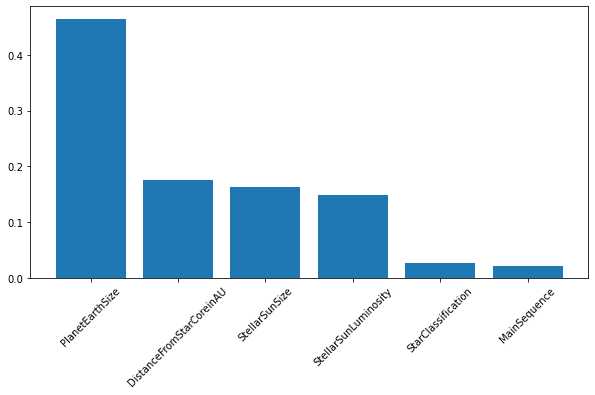

In [14]:
import matplotlib.pyplot as plt

f_impt = pd.DataFrame(lr.feature_importances_, index=X_rus.columns, columns=['RF']).sort_values(by='RF', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(f_impt.index, f_impt['RF'])
plt.xticks(rotation=45)
plt.show()

In [15]:
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2)

lr = XGBClassifier(random_state=42)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(classification_report(y_test, pred))

C:\Users\paolo\anaconda3\envs\py39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       236
           1       0.74      0.78      0.76       248
           2       0.78      0.77      0.77       213
           3       0.94      0.97      0.96       242
           4       0.93      0.94      0.94       226

    accuracy                           0.86      1165
   macro avg       0.86      0.86      0.86      1165
weighted avg       0.86      0.86      0.86      1165



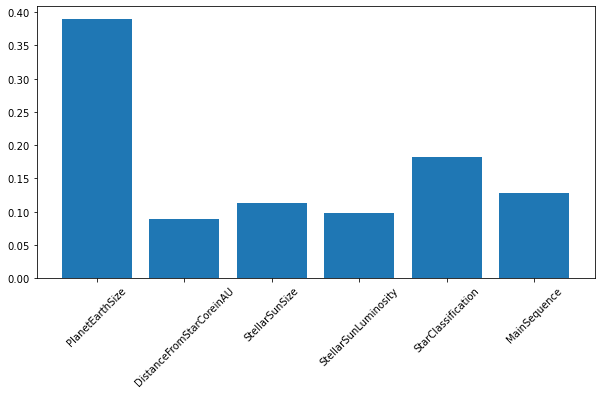

In [16]:
f_impt['XGBOOST'] = pd.DataFrame(lr.feature_importances_, index=X_rus.columns, columns=['XGBOOST']).sort_values(by='XGBOOST', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(f_impt.index, f_impt['XGBOOST'])
plt.xticks(rotation=45)
plt.show()

,RF,XGBOOST,AVG
PlanetEarthRadius,0.511604,0.393766,0.452685
StellarSunLuminosity,0.210416,0.114544,0.162480
DistanceFromStarCoreinAU,0.214276,0.100992,0.157634
MainSequence,0.028782,0.213281,0.121031
StarClassification,0.034922,0.177418,0.106170


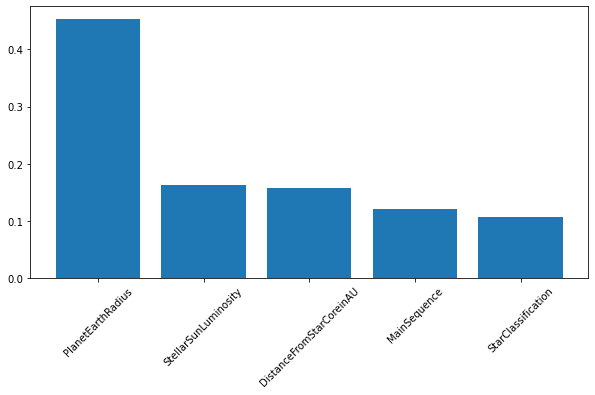

In [105]:
f_impt['AVG'] = (f_impt['RF'] + f_impt['XGBOOST']) / 2
f_impt = f_impt.sort_values(by='AVG', ascending=False)
display(f_impt)

plt.figure(figsize=(10, 5))
plt.bar(f_impt.index, f_impt['AVG'])
plt.xticks(rotation=45)
plt.show()

In [106]:
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2)

lr = CatBoostClassifier(random_state=42)
lr.fit(X_train, y_train, verbose=0)
pred = lr.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       231
           1       0.78      0.76      0.77       245
           2       0.76      0.79      0.78       218
           3       0.91      0.96      0.94       224
           4       0.90      0.91      0.91       247

    accuracy                           0.85      1165
   macro avg       0.85      0.85      0.85      1165
weighted avg       0.85      0.85      0.85      1165



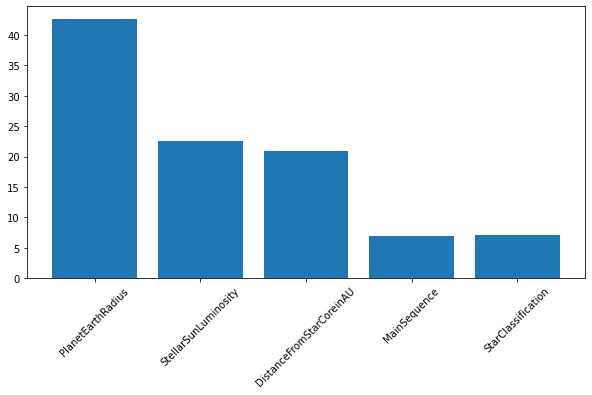

In [107]:
import matplotlib.pyplot as plt

f_impt['CAT'] = pd.DataFrame(lr.feature_importances_, index=X_rus.columns, columns=['CAT']).sort_values(by='CAT', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(f_impt.index, f_impt['CAT'])
plt.xticks(rotation=45)
plt.show()

In [108]:
f_impt

,RF,XGBOOST,AVG,CAT
PlanetEarthRadius,0.511604,0.393766,0.452685,42.572047
StellarSunLuminosity,0.210416,0.114544,0.162480,22.603025
DistanceFromStarCoreinAU,0.214276,0.100992,0.157634,20.907027
MainSequence,0.028782,0.213281,0.121031,6.868284
StarClassification,0.034922,0.177418,0.106170,7.049617
